## Tutorial #3: Referencing EEG Data
This tutorial is about effects of different approaches for referencing EEG data.

##### Referencing:
EEG recordings are collected by measuring the voltage differences between a part of the brain and the reference point. After collecting the data, the reference can be changed and this process is called re-referencing. If the reference changes, the amplitude of the signal at the channels will differ too. Therefore referencing is very critical for EEG data. Re-referencing can be formulazied as follows: 

new electrical potential at channel 'x' = electrical potential at channel 'x' + electrical potential at the original reference - electrical potential at the new reference

(Note: 'x' corresponds to channel id)

##### Selecting the reference:
Athough there is no optimal strategy for selecting the reference, there are several commonly applied approaches. 
One way is to compute the average of potentials at all the channels and use this average potential as the reference. The new reference does not have to be an existing channel, it can be a virtual one as well. After subtracting the averaged potential from electrical potential at each channel, re-referencing would be completed. 
Another approach would be to select the channels where electrical activity is the lowest such as ears. 

Apart from the commonly used approaches above, there are several statistical approaches to select the reference that perfom the best (https://doi.org/10.1016/j.jneumeth.2014.05.008). 

In [4]:
import mne
import mne.viz

In [27]:
#Load epoched data
data_file = '../../817_1_PDDys_ODDBALL_Clean_curated-epo'

# Read the EEG epochs:
epochs = mne.read_epochs(data_file + '.fif')

Reading ../../817_1_PDDys_ODDBALL_Clean_curated-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     500.00 ms
        0 CTF compensation matrices available
189 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


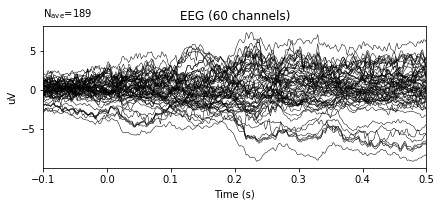

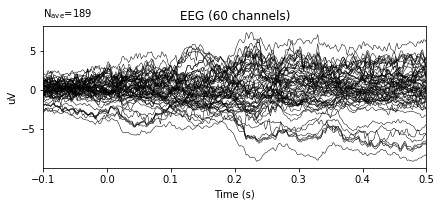

In [28]:
epochs.average().plot()

For re-referencing, a function named set_eeg_reference() is provided by MNE package. It can be called by epochs, evoked or raw objects. It takes the new reference channel or 'average' as parameter. If an existing channel name is given, it uses that channel directly as the new reference. Otherwise, it calculates the average potential and uses it as new reference. Note that this function modifies the original object. Therefore, if you want to keep the original object without any modification, use a deep copy of the original object.

In [29]:
import copy
# create a copy of original epopchs object for further comparison
original = copy.deepcopy(epochs)
re_ref_epochs = epochs.set_eeg_reference('average', projection=True)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


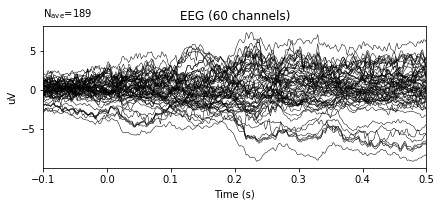

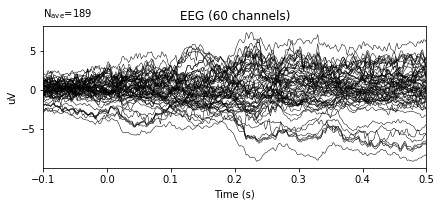

In [30]:
re_ref_epochs.average().plot()

In [25]:
#epochs.ch_names

Applying a custom EEG reference.
Removing existing average EEG reference projection.


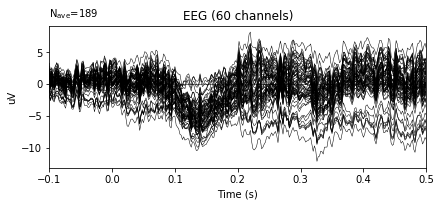

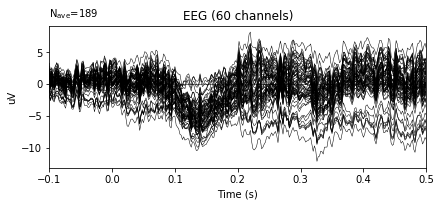

In [31]:
re_ref_epochs_2 = epochs.set_eeg_reference(['TP8'])
re_ref_epochs_2.average().plot()